Connection oldu


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2608\2458619111.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,mydb)


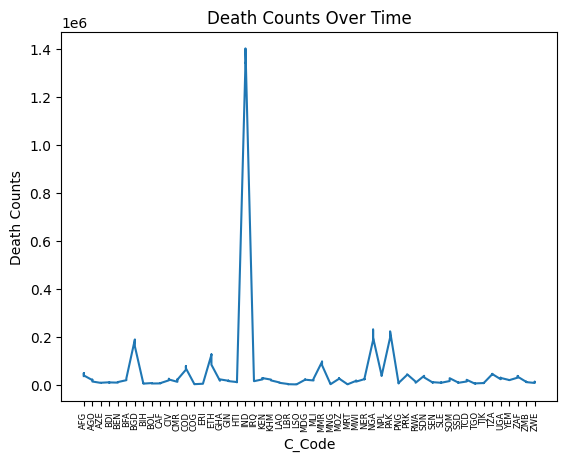

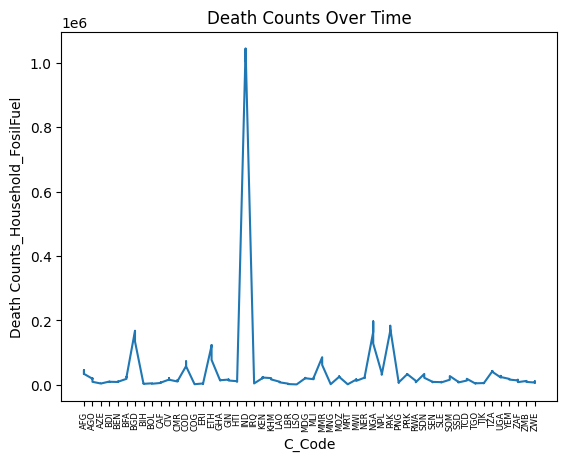

In [15]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from mysql.connector import errorcode
def connectionCreator():
    try:
        cnx = mysql.connector.connect(user='root',
                                    password = 'mysql02',
                                    database='project')
        print('Connection oldu')
        return cnx
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print("Something is wrong with your user name or password")
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print("Database does not exist")
        else:
            print(err)
        return None
    else:
        cnx.close()
        return None

#mydb = connectionCreator()
mydb = connectionCreator()
query ="SELECT a.C_Code, a.YYear, a.deathcounts, a.Household_FosilFuel FROM airpol_occure a INNER JOIN LifeExpact e ON a.C_Code = e.C_Code AND a.YYear = e.YYear WHERE a.deathcounts > 2500 AND e.Life_ex_value < (SELECT AVG(Life_ex_value) FROM LifeExpact)"
# By sending your query along with the connector, 
# pandas can automatically read the incoming data and create a dataframe for it

df = pd.read_sql(query,mydb)

#close the connection
mydb.close() 

plt.plot(df['C_Code'], df['deathcounts'])
plt.xlabel('C_Code')
plt.ylabel('Death Counts')
plt.title('Death Counts Over Time')

plt.xticks(rotation=90, fontsize=6)
plt.savefig('Death Counts Over Time.png')

plt.show()
''' 
#for household_fuel 

plt.plot(df['C_Code'], df['Household_FosilFuel'])
plt.xlabel('C_Code')
plt.ylabel('Death Counts_Household_FosilFuel')
plt.title('Death Counts Over Time')

plt.xticks(rotation=90, fontsize=6)
plt.savefig('Death Counts Over Time Household_FosilFuel.png')

plt.show()
'''